# Red Neuronal Recurrente

Crea una red neuronal para predecir el precio del dolar

In [9]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para el preprocesamiento de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Librerías para crear la red neuronal
from keras.models import Sequential
from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU

## 1. Leer la información del *dataset dolar.csv*

In [10]:
data = pd.read_csv('datasets/dolar.csv', header=None)
data

,0
0,17.0297
1,17.0492
2,17.0458
3,16.8987
4,16.8133
...,...
432,18.4082
433,18.3232
434,18.4312
435,18.4457


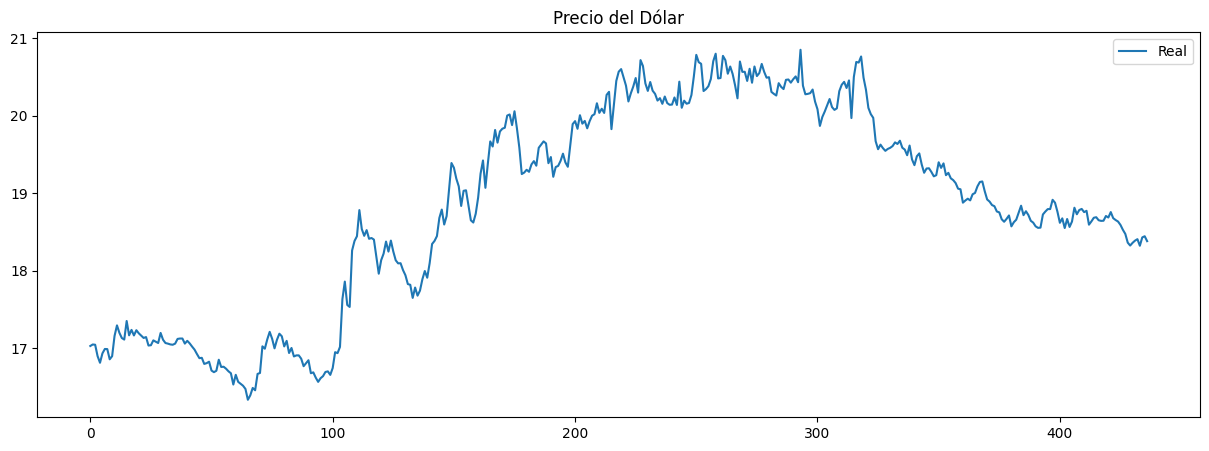

In [11]:
# Grafico de la serie de tiempo
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(data, label='Real')
plt.legend()

## 2. Crear secuencias temporales

In [ ]:
# Normalización de los precios
prices = np.array(data[0])

normalizer = MinMaxScaler()
prices_norm = normalizer.fit_transform(prices.reshape(-1, 1))

# Crear datos de entrada y de salida, en base a secuencias
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(prices_norm, time_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))